## Author: Seo Won Yi (yiseo)
## Collaborator: Serena Ban

### Part 1: HMC in PyMC

Fit the model (Location Scale T) using PyMC

In [1]:
# import necessary modules for the project

import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import arviz as az

# for simulation purpose, choose the true parameters
# set seed for reproducibility
np.random.seed(seed=1004)
n = 100

loc_true,scale_true,df_true = 10, 2, 15

# simulate the data 

x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)

# specify the model through PyMC

location_scale_t_model = pm.Model()

with location_scale_t_model:
    mu = pm.Normal("mu", mu=5, sigma=10)
    nu = pm.DiscreteUniform("nu", lower=1, upper=101)
    sigma = pm.HalfNormal("sigma", sigma=10)
    x_obs = pm.StudentT("likelihood", nu=nu, mu=mu, sigma=sigma, observed=x)

In [2]:
# perform the HMC
with location_scale_t_model:
    HMC_result = pm.sample(chains=4, random_seed=[1, 2, 3, 4])

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


HMC Split-Rhats {'mu': 0.9998, 'nu': 1.0013, 'sigma': 1.0005}


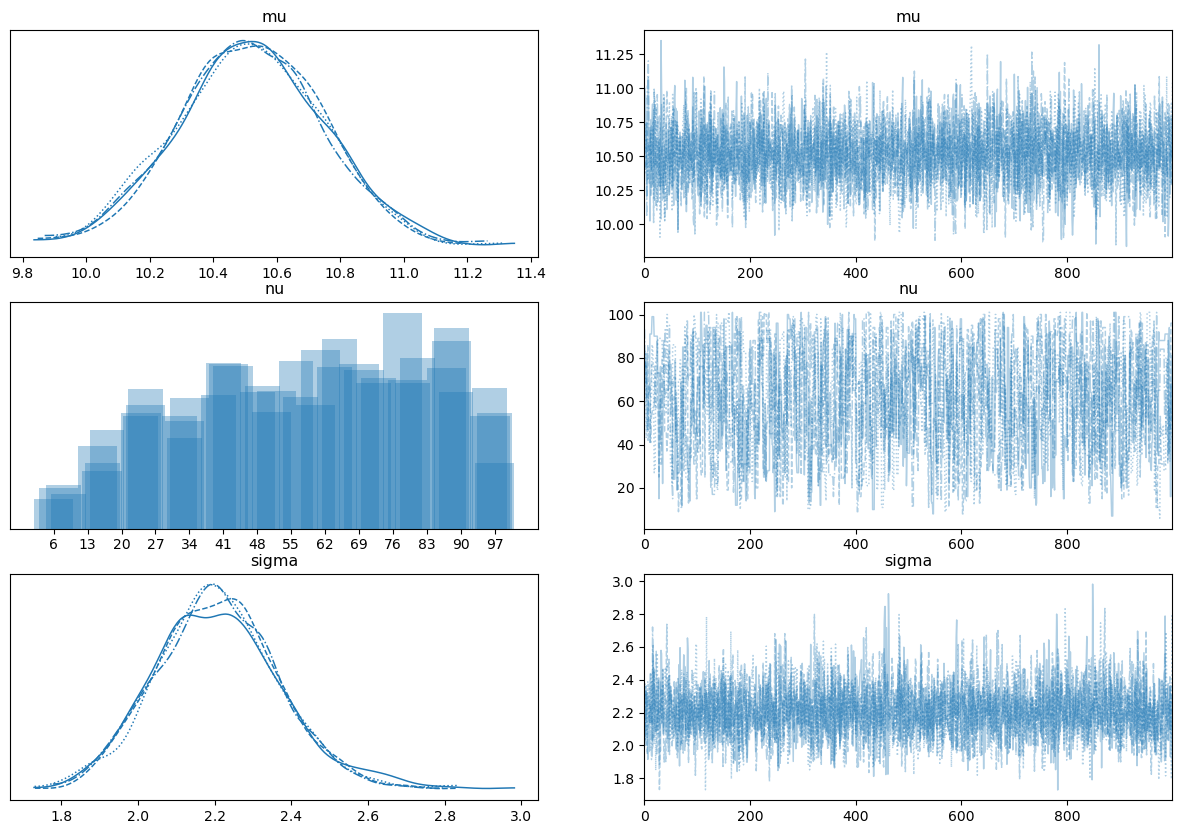

In [3]:
# Check convergence of the chains and check the Rhat value

f, ax = plt.subplots(3, 2, figsize=(15, 10))
az.plot_trace(HMC_result, axes=ax[:3,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(HMC_result).items()})

As we can see from above, the inference on df parameter needs improvement as we cannot get any meaningful information from what we have right now.

In [4]:
# To find the sample size needed to support inference regarding the df parameter,
# we repeat the experiment with different sample sizes
# I will terminate the algorithm once all four chains end up with mean value that is within
# epsilon of the true df parameter
# assume four chains 

np.random.seed(seed=1004)

n = 100

loc_true,scale_true,df_true = 10, 2, 15
epsilon = 2

# loop until we get somewhat nice result (within epsilon of the true parameter)

while np.mean(HMC_result.posterior.nu[0]) > df_true + epsilon \
or np.mean(HMC_result.posterior.nu[0]) < df_true - epsilon \
or np.mean(HMC_result.posterior.nu[1]) > df_true + epsilon \
or np.mean(HMC_result.posterior.nu[1]) < df_true - epsilon \
or np.mean(HMC_result.posterior.nu[2]) > df_true + epsilon \
or np.mean(HMC_result.posterior.nu[2]) < df_true - epsilon \
or np.mean(HMC_result.posterior.nu[3]) > df_true + epsilon \
or np.mean(HMC_result.posterior.nu[3]) < df_true - epsilon:
    
    # increase the sample size
    n += 100
    # simulate samples of data
    x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)
    
    # perform HMC using PyMC

    location_scale_t_model = pm.Model()

    with location_scale_t_model:
        mu = pm.Normal("mu", mu=5, sigma=10)
        nu = pm.DiscreteUniform("nu", lower=1, upper=101)
        sigma = pm.HalfNormal("sigma", sigma=10)
        x_obs = pm.StudentT("likelihood", nu=nu, mu=mu, sigma=sigma, observed=x)
    with location_scale_t_model:
        HMC_result = pm.sample(chains=4, random_seed=[10, 20, 30, 40])

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [5]:
# print the chosen n

n

1700

HMC Split-Rhats {'mu': 1.0014, 'nu': 1.0245, 'sigma': 1.016}


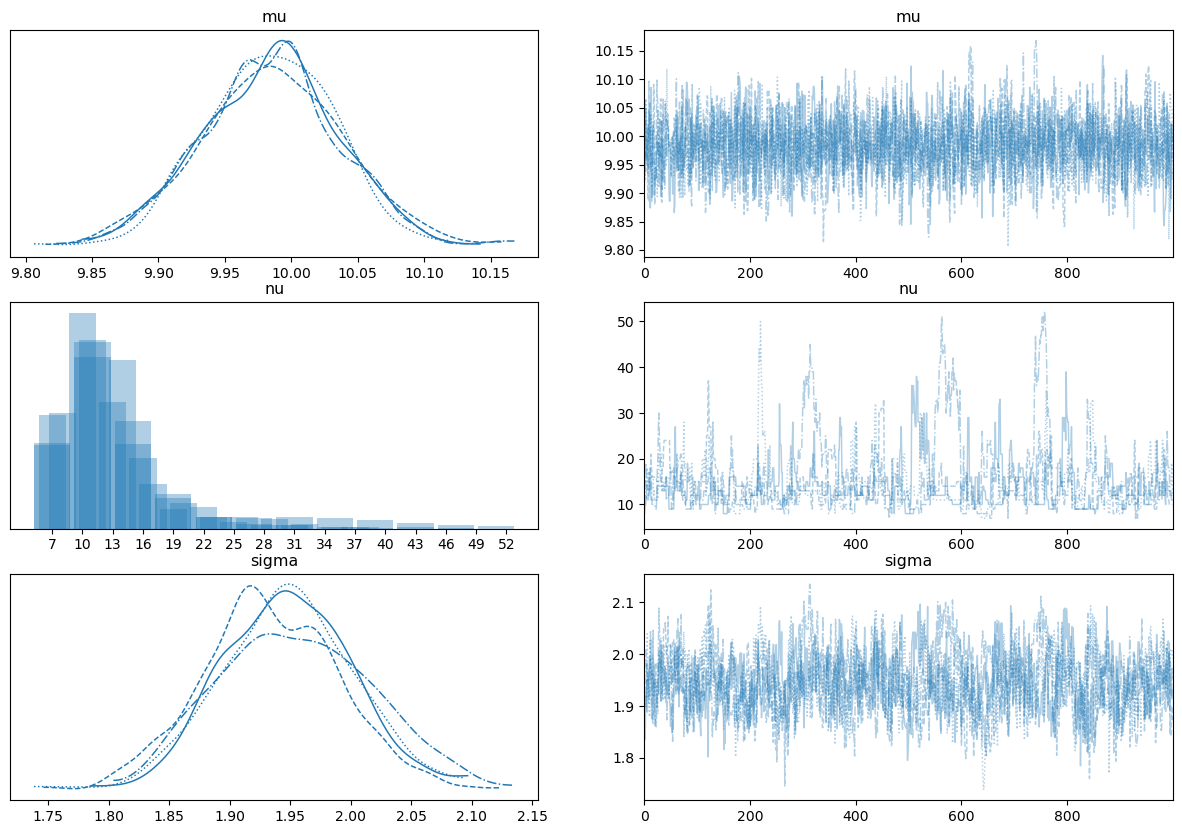

In [6]:
# plot the results to confirm that we made a good inference on degrees of freedom

# Check convergence of the chains and check the Rhat value

f, ax = plt.subplots(3, 2, figsize=(15, 10))
az.plot_trace(HMC_result, axes=ax[:3,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(HMC_result).items()})

We can observe more clear distribution to make inference for the degrees of freedom.

### Part 2: HMC Diagnostics

In [7]:
# report the effective sample size
print("number of MCMC samples:", HMC_result.posterior['nu'].values.flatten().shape[-1])
az.summary(HMC_result, round_to=5)

number of MCMC samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,9.98443,0.05109,9.88651,10.07762,0.00108,0.00076,2241.96231,1938.88988,1.00137
nu,14.38750,6.10108,7.00000,24.00000,0.46059,0.33721,215.97198,177.03262,1.02446
sigma,1.94558,0.05723,1.83272,2.04638,0.00326,0.00231,309.30028,488.98246,1.01595


The effective sample size for the parameter $\mu$ is approximately 2242 and for $\nu$ is around 216. Finally, the effective sample size for the parameter $\tau$ (thus, $\tau^{2}$) is around 309 for this example.

HMC Split-Rhats {'mu': 1.0014, 'nu': 1.0245, 'sigma': 1.016}


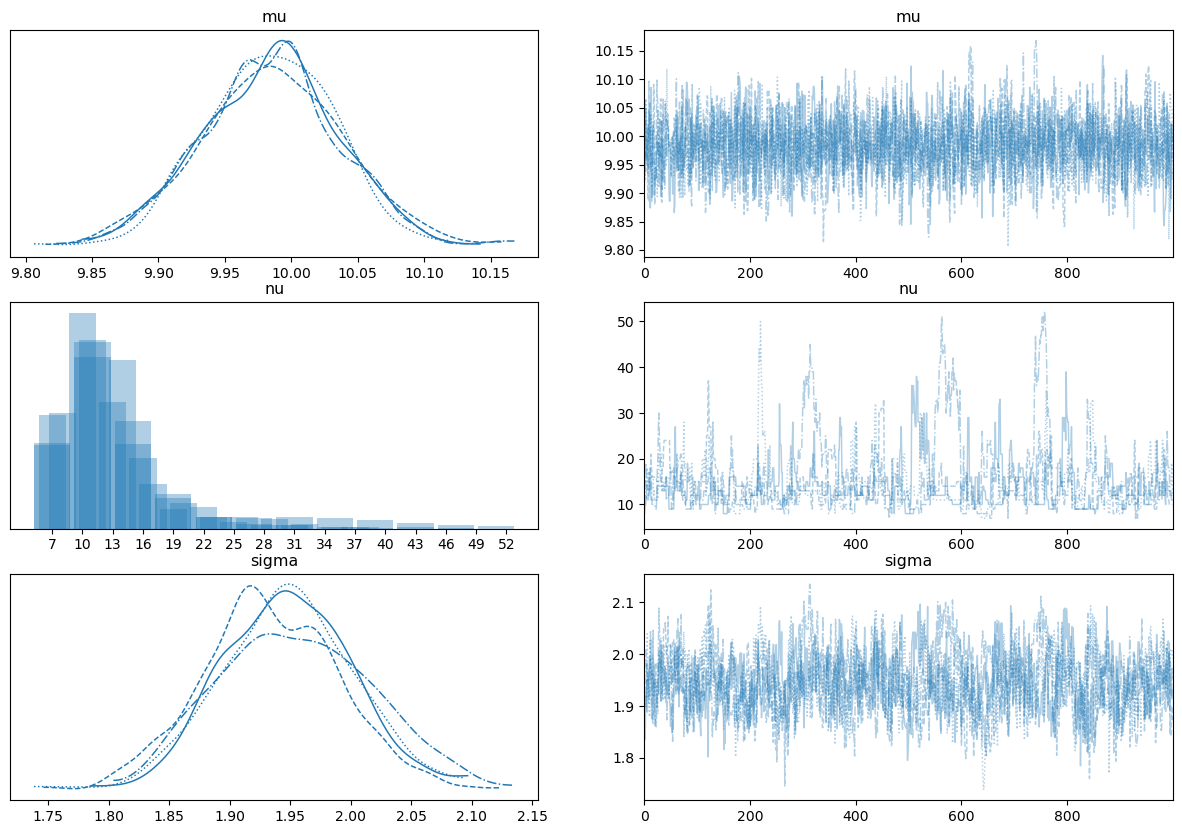

In [8]:
# chain convergence measures

f, ax = plt.subplots(3, 2, figsize=(15, 10))
az.plot_trace(HMC_result, axes=ax[:3,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(HMC_result).items()})

We can easily see that all four chains for all the parameters converged fairly well with the values of split $\hat{R}$ less than 1.05

There were four chains used and according to the PyMC, there was no divergences. 

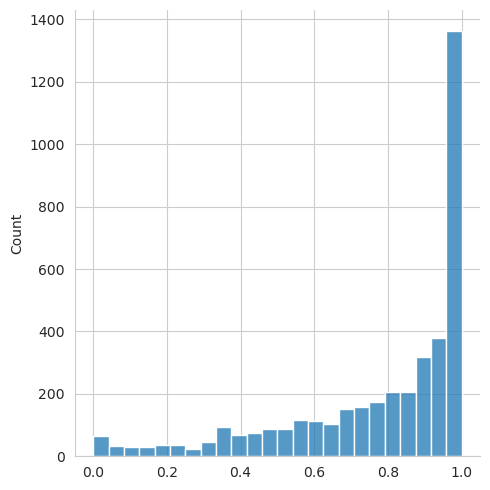

In [40]:
# Metropolis-Hastings acceptance rates
import seaborn as sns

# we can visualize the acceptance rate for this example

sns.set_style('whitegrid')
sns.displot(HMC_result.sample_stats.acceptance_rate.values.flatten())


While attempting to perform HMC on a smaller sample sizes, I encountered errors such as 
"The effective sample size per chain is smaller than 100 for some parameters" and "The rhat statistic is larger than 1.01 for some parameters."

Also, messages indicated that for the parameters with continuous prior distributions NUTS method was used while performing HMC and with a parameter with discrete prior distributions, Metropolis Hasting was used for MCMC sampling.

For this part of exercise, we will make analysis on the example provided at https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb

For our convenience, the codes are copied to this notebook.

In [44]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

with pm.Model() as Centered_eight:

    # We assume the following prior distributions for our parameters
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)

    # and we assume the following probabilistic hierarchy
    # within the data generating mechanism
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J) # theta is length J=8

    # Note that if tau was small, then the density evalution above
    # could change rapidly for changes in theta
    # This means that the energy has high curvature

    # likelihood where observed information enters into the model
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

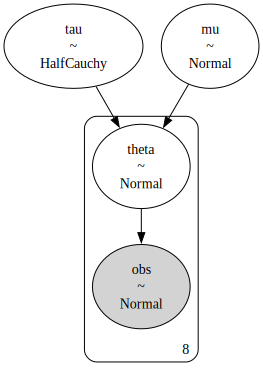

In [45]:
pm.model_to_graphviz(Centered_eight)

In [46]:
# This posterior distribution implied by this specification can be sampled from
# using HMC where the necessary auxiliary variables are added "under the hood"
SEED = [20100420, 20134234] # random seeds for each of two run HMC chains
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [47]:
# We can get some more information by turning on logging
import logging # dir(logging) for available functionality
_log = logging.getLogger("pymc")
#_log.setLevel(logging.NOTSET) # 0
_log.setLevel(logging.INFO) # 20
#_log.setLevel(logging.WARNING) # 30
#_log.setLevel(logging.ERROR) # 40

In [48]:
# We now see that the NUTS implementation (version of HMC) is being used to
# sample from the posterior distributions of our parameters [mu, tau, theta]
SEED = [20100420, 20134234]
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [49]:
# As is seen above, there are many divergences because the specification above
# induces high curature in the energy, but the following alternative
# parameterization alleviates this problem.

with pm.Model() as NonCentered_eight:

    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    # Changes in theta now take place on a fixed scale that is independent of tau

    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    # Changes in tau can still result in rapid changes in the density evaluations
    # below so the energy still has high curvature with respect to tau; but,
    # it no longer has high curvature with respect to theta
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

In [50]:
with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})
# Now very few divergences... problem solved!

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta_t]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


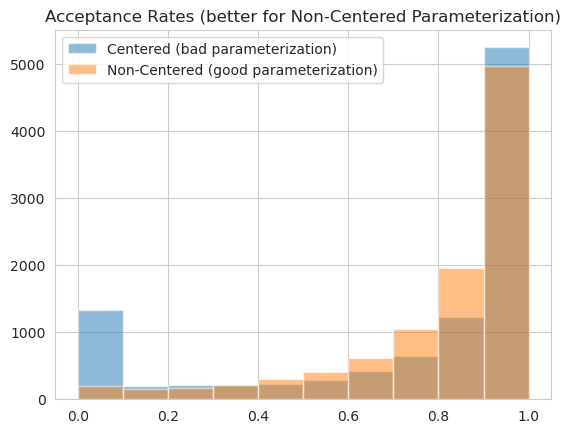

In [51]:
plt.hist(fit_C.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Centered (bad parameterization)');
plt.hist(fit_NC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Non-Centered (good parameterization)');
plt.title('Acceptance Rates (better for Non-Centered Parameterization)'); plt.legend();

In [52]:
import pandas as pd
print("Effective Sample Sizes (function of Markov Chain autocorrelation dependency)")
pd.concat(
[pd.DataFrame({'Centered': pm.summary(fit_C)[:1]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][:1]}),
 pd.DataFrame({'Centered': pm.summary(fit_C)[1:]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][9:]})])

Effective Sample Sizes (function of Markov Chain autocorrelation dependency)


,Centered,Non-Centered
mu,742.0,11904.0
tau,60.0,5956.0
theta[0],1179.0,9879.0
theta[1],1366.0,11655.0
theta[2],1754.0,10704.0
theta[3],1808.0,11938.0
theta[4],1724.0,12008.0
theta[5],1960.0,11047.0
theta[6],1087.0,10834.0
theta[7],1947.0,10959.0


In [53]:
# we will perform chain convergence measures for both models

print("Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(fit_C).items()})
print("Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(fit_NC).items()})

Split-Rhats {'mu': 1.0022, 'theta': array([1.0021, 1.0017, 1.0047, 1.0028, 1.0076, 1.0056, 1.0028, 1.0041]), 'tau': 1.0355}
Split-Rhats {'mu': 0.9999, 'theta_t': array([1.0003, 1.0001, 1.0002, 1.    , 1.0002, 1.0003, 1.0002, 1.0002]), 'tau': 1.0004, 'theta': array([0.9999, 1.    , 1.0001, 1.0003, 1.    , 1.    , 1.    , 1.0001])}


We will discuss the followings for "centered" and "uncentered models"

(a) effective sample sizes

We can easily observe that the effective sample size for parameters in non-centered model are much higher compared to the parameters in centered model. The centered model depends heavily on the previous parameters' values as the simulation is done directly using those parameters; whereas, for uncentered model, the dependency is reduced due to the introduction of the intermediate deterministic step with a perturbance scaled by a simple standard normal distribution.

(b) chain convergence measures

We can see that for both centered and uncentered models, all the parameters contain split $\hat{R}$ values less than 1.05. Even though there were some divergences, we can see that the chains converged. 

(c) divergences 

We can observe that for centered model, we have 433 divergences whereas for uncentered model we have 12 divergences. Small $\tau$ value may result in $\theta$ values to not fit in $N(\mu, \tau)$ anymore which may result in divergences of the MCMC sampling. However, by introducing the intermediate step with fixed scaling through a standard normal distribution, the effect of $\tau$ upon $\theta$ became independent.

(d) Metropolis-Hastings acceptance rates 

We can see that for centered model, there were a lot more cases where the acceptance rates happen to be very low compared to the uncentered model. Due to heavy dependency of parameters of the random effect, the proposed update on $\theta$ was too high which caused more rejections. However, after introducing the fixed scale, the update suggested remained to be relatively smaller which induced removal of the low acceptance rates.

(e) any other warnings or concers provided by PyMC

First warnings that were produced by PyMC were about having too little chains. Since there were cases with divergences, it would be safe to check the convergence with more chains to guarantee that those convergences were not by "fluke. "

From the perspective of curvature of the energy function (that is, how rapidly the log joint posterior distribution density changes for different values of its random variable (parameters) and the effectiveness of the HMC algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization.

We know that uncentered parameterization of the model causes much lower divergences compared to centered parametrization. Knowing that divergences are related to lower acceptance rate which is caused by the excessive curvature in the energy function. Excessive curvature would mean a rapid change in one step of evolution which usually causes drifting away from the energy contour. To compensate this, HMC algorithm would choose to move with a smaller steps which will make the algorithm inefficient and slow. 

Thus, we can conclude that uncentered parameterization is better than centered parameterization.

<Axes: >

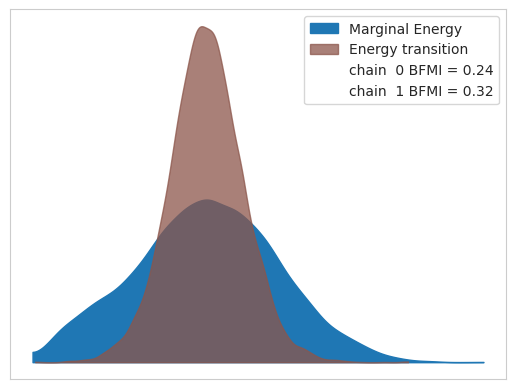

In [55]:
import arviz as az

az.plot_energy(fit_C)

We can see form the above that two plots, marginal energy distribution of the sampling run and the other is the distribution of the energy transitions between steps have huge difference. This indicates that there exists bias in posterior distributions. We notice that energy transition plot is much narrower than marginal energy which indicates not entire parameter space was visited during the sampling.

Thus, centerned model had obvious flaws which is highly associated with what we described earlier (low acceptance rate -> small steps -> not enough exploration in parameter space).

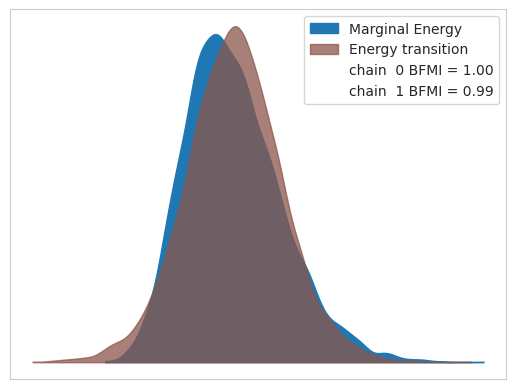

In [56]:
az.plot_energy(fit_NC);

On the other hand, for non-centered parametrization, we notice that two plots are almost identical. This indicates relatively unbiased posterior distributions and that the enough parameter space was explored. Thus, HMC was performing well.

As we expected, non-centered model shows a better performance which agrees with our previous result.